# Requirements

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from xgboost import XGBClassifier
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [19]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data 

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [17]:
data = pd.read_csv("./data/climate.csv")

Explore the dataset using visualizations of your choice.

In [21]:
data.set_index('date', inplace=True)
data

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


<Axes: >

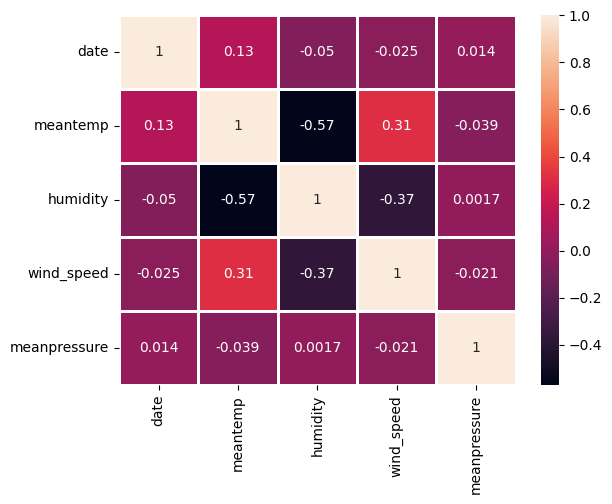

In [20]:
sns.heatmap(data.corr(), annot=True, linewidths=2)
# meantemp e target kolona

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [22]:
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

for feature in features:
    for lag in range(1,4):
        data[f'{feature}_lag{lag}'] = data[feature].shift(lag)


In [25]:
df = data.copy()
df = df.dropna()
df

,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,meantemp_lag2,meantemp_lag3,humidity_lag1,humidity_lag2,humidity_lag3,wind_speed_lag1,wind_speed_lag2,wind_speed_lag3,meanpressure_lag1,meanpressure_lag2,meanpressure_lag3
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,7.400000,10.000000,87.000000,92.000000,84.500000,4.633333,2.980000,0.000000,1018.666667,1017.800000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,7.166667,7.400000,71.333333,87.000000,92.000000,1.233333,4.633333,2.980000,1017.166667,1018.666667,1017.800000
2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,8.666667,7.166667,86.833333,71.333333,87.000000,3.700000,1.233333,4.633333,1016.500000,1017.166667,1018.666667
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,6.000000,8.666667,82.800000,86.833333,71.333333,1.480000,3.700000,1.233333,1018.000000,1016.500000,1017.166667
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,7.000000,6.000000,78.600000,82.800000,86.833333,6.300000,1.480000,3.700000,1020.000000,1018.000000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,17.142857,14.000000,67.550000,74.857143,94.300000,8.335000,8.784211,9.085000,1017.200000,1016.952381,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,16.850000,17.142857,68.043478,67.550000,74.857143,3.547826,8.335000,8.784211,1015.565217,1017.200000,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,17.217391,16.850000,87.857143,68.043478,67.550000,6.000000,3.547826,8.335000,1016.904762,1015.565217,1017.200000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [104]:
from sklearn.model_selection import train_test_split
columns = ['meantemp','meantemp_lag1', 'meantemp_lag2', 'meantemp_lag3']
X = df.drop(columns = columns,axis=1)
y = df['meantemp']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

In [29]:

y.unique()

array([ 8.66666667,  6.        ,  7.        ,  8.85714286, 14.        ,
       11.        , 15.71428571, 15.83333333, 12.83333333, 14.71428571,
       13.83333333, 16.5       , 12.5       , 11.28571429, 11.2       ,
        9.5       , 12.25      , 12.66666667, 12.85714286, 14.83333333,
       14.125     , 16.2       , 16.        , 16.28571429, 18.        ,
       17.42857143, 16.625     , 16.66666667, 15.6       , 15.42857143,
       15.25      , 15.875     , 15.33333333, 17.33333333, 19.16666667,
       14.42857143, 13.66666667, 15.85714286, 17.71428571, 20.        ,
       20.5       , 16.85714286, 16.875     , 17.85714286, 20.8       ,
       19.42857143, 19.        , 19.33333333, 17.6       , 20.875     ,
       20.85714286, 23.42857143, 24.16666667, 25.42857143, 23.14285714,
       24.        , 23.5       , 21.5       , 22.33333333, 20.33333333,
       22.66666667, 22.5       , 29.16666667, 23.83333333, 25.25      ,
       27.375     , 27.        , 24.14285714, 21.        , 22.42

In [30]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(X_train)
test_X = scaler.transform(X_test)

In [31]:
X.shape[1]

12

In [97]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, kernel_initializer="uniform", activation="relu"),
   # Dropout(0.1),
    Dense(8, kernel_initializer="uniform", activation="relu"),
    Dense(1, kernel_initializer="uniform", activation="linear"),
])

In [98]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"]
)

In [100]:
history = model.fit(train_X, y_train, validation_split=0.1, epochs=32, batch_size=8)



Epoch 1/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 706.5557 - mean_squared_error: 706.5557 - val_loss: 243.3331 - val_mean_squared_error: 243.3331
Epoch 2/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 502.3807 - mean_squared_error: 502.3807 - val_loss: 34.4496 - val_mean_squared_error: 34.4496
Epoch 3/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 144.9792 - mean_squared_error: 144.9792 - val_loss: 116.0202 - val_mean_squared_error: 116.0202
Epoch 4/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 136.2397 - mean_squared_error: 136.2397 - val_loss: 104.7769 - val_mean_squared_error: 104.7769
Epoch 5/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 119.1748 - mean_squared_error: 119.1748 - val_loss: 100.6484 - val_mean_squared_error: 100.6484
Epoch 6/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 107.4981 - mean_squared_error: 107.4981 - val_loss: 77.0710 - val_mean_squared_error: 77.0710
Epoch 7/32
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - lo

<Axes: >

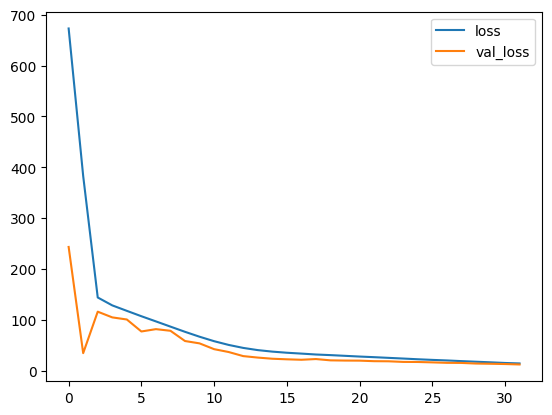

In [101]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [102]:
pred_y = model.predict(test_X)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [103]:
r2_score(y_test, pred_y)

-36.87606095894461

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [106]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)

Use the trained model to make predictions for the test set.

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest\n')
print(f'MSE: {mse_rf}')
print(f'MAE: {mae_rf}')
print(f'R2 : {r2_rf}')

Random Forest

MSE: 6.5833447516123975
MAE: 1.9937158868698697
R2 : 0.7944729582262875


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

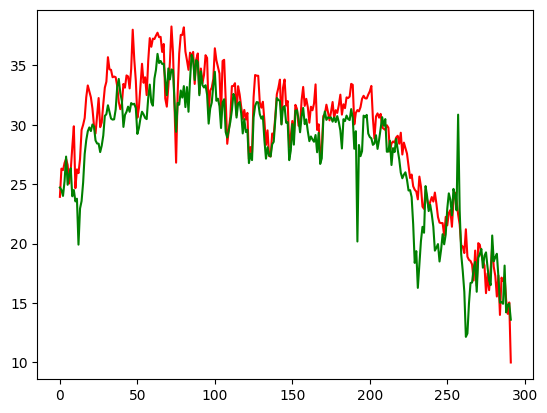

In [108]:
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(y_pred_rfr, label='RF Prediction', color='green')
plt.show()

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [109]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.01, max_depth=3)
model_xgb.fit(X_train, y_train)

y_pred_xgb=model_xgb.predict(X_test)

Use the trained model to make predictions for the test set.

In [110]:
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'XGBoost\n')
print(f'MSE: {mse_xgb}')
print(f'MAE: {mae_xgb}')
print(f'R2 : {r2_xgb}')

XGBoost

MSE: 15.688791348731185
MAE: 3.4546576520332164
R2 : 0.5102078052163387


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

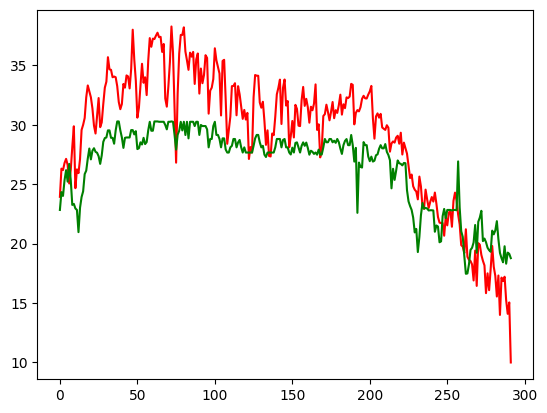

In [111]:
plt.plot(y_test.values,  color='red',label='Actual')
plt.plot(y_pred_xgb, label='XGB Prediction', color='green')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [113]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
model = RandomForestRegressor(criterion='squared_error')
param_grid = {
    'max_depth': [5,10,15,20],
    'n_estimators': [100,200],
    'min_samples_split':[2,5]
}
tscv = TimeSeriesSplit(n_splits =5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, shuffle=False)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [114]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Mean Squared Error: {mse}")
print(f'Mean Absolute Error: {mae}')
print(f'R2 : {r2}')

Best max_depth: 15
Mean Squared Error: 6.42571779202596
Mean Absolute Error: 1.8625243432625418
R2 : 0.8026678071142671


## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

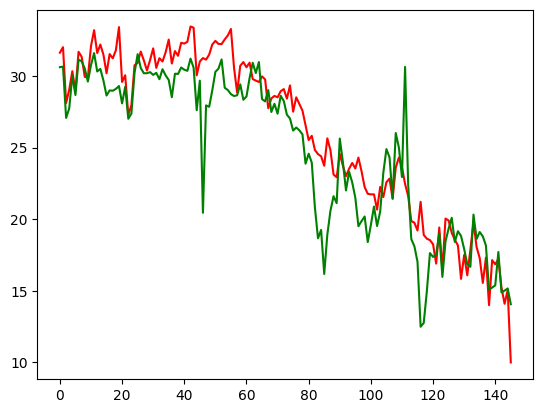

In [115]:
plt.plot(y_test.values, label='Actual', color='red')
plt.plot(y_pred, label='RF Prediction', color='green')
plt.show()